0: Burpees
1: Medicine Ball
2: armraise
3: boso
4: bosopushup
5: boxing
6: chair
7: curl
8: cycling
9: dips
10: flix
11: freestyle
12: hammerthrows
13: highraise
14: kicking
15: onelegdown
16: plank
17: punchball
18: pushups
19: ridgeplunges
20: running
21: scooter
22: sideside
23: sidestretch
24: singlelegright
25: split
26: squat
27: step
28: throws
29: vshiftswift
30: weights

In [21]:
#importing all required packages

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.preprocessing import RobustScaler
import time
import pickle
import os

import warnings
warnings.filterwarnings('ignore')

In [22]:
#reading csv file for the filtered data
columns = ["SubjectID","Timestamp(microseconds)","AccelX(g)_leg","AccelY(g)_leg","AccelZ(g)_leg","GyroX(¬∞/s)_leg","GyroY(¬∞/s)_leg","GyroZ(¬∞/s)_leg","AccelX(g)_hand","AccelY(g)_hand","AccelZ(g)_hand","GyroX(¬∞/s)_hand","GyroY(¬∞/s)_hand","GyroZ(¬∞/s)_hand","AccelX(g)_chest","AccelY(g)_chest","AccelZ(g)_chest","Sample(V)","Activity_Label"]
df = pd.read_csv("PDdata_31activities.csv", header=0, names = columns, dtype={'SubjectID': str})

In [23]:
df

,SubjectID,Timestamp(microseconds),AccelX(g)_leg,AccelY(g)_leg,AccelZ(g)_leg,GyroX(¬∞/s)_leg,GyroY(¬∞/s)_leg,GyroZ(¬∞/s)_leg,AccelX(g)_hand,AccelY(g)_hand,AccelZ(g)_hand,GyroX(¬∞/s)_hand,GyroY(¬∞/s)_hand,GyroZ(¬∞/s)_hand,AccelX(g)_chest,AccelY(g)_chest,AccelZ(g)_chest,Sample(V),Activity_Label
0,1,1613575026007263,-0.621653,0.469306,-0.509712,-24.017700,13.641566,-24.750134,-0.914015,-0.436103,0.203189,-7.232776,8.575570,-4.608225,-0.027771,0.902419,-0.315862,-0.006521,Medicine Ball
1,1,1613575026023239,-0.621653,0.435859,-0.520333,-26.276036,15.899901,-25.665675,-0.884230,-0.441596,0.183658,-7.598993,8.453498,-4.730297,-0.027771,0.902419,-0.315862,-0.006521,Medicine Ball
2,1,1613575026039215,-0.622751,0.419989,-0.560128,-25.848783,16.021973,-24.444953,-0.884352,-0.448432,0.208316,-4.730297,9.185931,-5.401694,-0.027771,0.902419,-0.315862,-0.006521,Medicine Ball
3,1,1613575026055191,-0.625437,0.418280,-0.545846,-22.064546,14.923323,-18.829633,-0.893629,-0.447456,0.200626,-3.509575,9.308003,-6.012055,-0.011170,0.953689,-0.340276,-0.007868,Medicine Ball
4,1,1613575026071167,-0.621164,0.406073,-0.505074,-9.430076,11.810483,-9.430076,-0.881422,-0.404730,0.189029,-0.457771,9.674220,-6.256199,-0.011170,0.953689,-0.340276,-0.007868,Medicine Ball
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367976,8,1614295140928869,-1.160723,-0.046326,0.274479,33.417258,-35.919738,-34.149691,0.470649,0.293400,-0.783276,53.925383,3.082322,-27.862974,-0.303166,0.894118,0.033265,-0.010724,kicking
367977,8,1614295140944846,-1.077592,-0.114809,0.132265,28.168154,-10.772869,-33.173114,0.466133,0.296574,-0.814771,54.047456,0.030518,-24.628061,-0.310491,0.842359,0.020081,-0.009413,kicking
367978,8,1614295140960823,-1.013016,-0.075624,-0.015930,-3.082322,4.425116,-37.506676,0.465278,0.314397,-0.822217,53.864347,-3.326467,-19.562066,-0.310491,0.842359,0.020081,-0.009413,kicking
367979,8,1614295140976800,-0.677317,0.022278,-0.229068,-41.412985,25.909819,-35.553521,0.456123,0.335149,-0.818677,46.540017,-7.354849,-14.190890,-0.289982,0.826734,-0.032166,-0.009739,kicking


In [24]:
len(df['Activity_Label'].unique())

31

In [25]:
df['Activity_Label'].unique()

array(['Medicine Ball', 'Burpees', 'step', 'scooter', 'boxing', 'cycling',
       'pushups', 'punchball', 'highraise', 'hammerthrows', 'weights',
       'throws', 'ridgeplunges', 'sidestretch', 'split', 'plank', 'dips',
       'singlelegright', 'vshiftswift', 'running', 'freestyle', 'curl',
       'armraise', 'flix', 'bosopushup', 'sideside', 'boso', 'onelegdown',
       'chair', 'squat', 'kicking'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Activity_Label'] = LE.fit_transform(df['Activity_Label'])

In [27]:
for i, label in enumerate(LE.classes_):
    print(f"{i}: {label}")

0: Burpees
1: Medicine Ball
2: armraise
3: boso
4: bosopushup
5: boxing
6: chair
7: curl
8: cycling
9: dips
10: flix
11: freestyle
12: hammerthrows
13: highraise
14: kicking
15: onelegdown
16: plank
17: punchball
18: pushups
19: ridgeplunges
20: running
21: scooter
22: sideside
23: sidestretch
24: singlelegright
25: split
26: squat
27: step
28: throws
29: vshiftswift
30: weights


In [28]:
df

,SubjectID,Timestamp(microseconds),AccelX(g)_leg,AccelY(g)_leg,AccelZ(g)_leg,GyroX(¬∞/s)_leg,GyroY(¬∞/s)_leg,GyroZ(¬∞/s)_leg,AccelX(g)_hand,AccelY(g)_hand,AccelZ(g)_hand,GyroX(¬∞/s)_hand,GyroY(¬∞/s)_hand,GyroZ(¬∞/s)_hand,AccelX(g)_chest,AccelY(g)_chest,AccelZ(g)_chest,Sample(V),Activity_Label
0,1,1613575026007263,-0.621653,0.469306,-0.509712,-24.017700,13.641566,-24.750134,-0.914015,-0.436103,0.203189,-7.232776,8.575570,-4.608225,-0.027771,0.902419,-0.315862,-0.006521,1
1,1,1613575026023239,-0.621653,0.435859,-0.520333,-26.276036,15.899901,-25.665675,-0.884230,-0.441596,0.183658,-7.598993,8.453498,-4.730297,-0.027771,0.902419,-0.315862,-0.006521,1
2,1,1613575026039215,-0.622751,0.419989,-0.560128,-25.848783,16.021973,-24.444953,-0.884352,-0.448432,0.208316,-4.730297,9.185931,-5.401694,-0.027771,0.902419,-0.315862,-0.006521,1
3,1,1613575026055191,-0.625437,0.418280,-0.545846,-22.064546,14.923323,-18.829633,-0.893629,-0.447456,0.200626,-3.509575,9.308003,-6.012055,-0.011170,0.953689,-0.340276,-0.007868,1
4,1,1613575026071167,-0.621164,0.406073,-0.505074,-9.430076,11.810483,-9.430076,-0.881422,-0.404730,0.189029,-0.457771,9.674220,-6.256199,-0.011170,0.953689,-0.340276,-0.007868,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367976,8,1614295140928869,-1.160723,-0.046326,0.274479,33.417258,-35.919738,-34.149691,0.470649,0.293400,-0.783276,53.925383,3.082322,-27.862974,-0.303166,0.894118,0.033265,-0.010724,14
367977,8,1614295140944846,-1.077592,-0.114809,0.132265,28.168154,-10.772869,-33.173114,0.466133,0.296574,-0.814771,54.047456,0.030518,-24.628061,-0.310491,0.842359,0.020081,-0.009413,14
367978,8,1614295140960823,-1.013016,-0.075624,-0.015930,-3.082322,4.425116,-37.506676,0.465278,0.314397,-0.822217,53.864347,-3.326467,-19.562066,-0.310491,0.842359,0.020081,-0.009413,14
367979,8,1614295140976800,-0.677317,0.022278,-0.229068,-41.412985,25.909819,-35.553521,0.456123,0.335149,-0.818677,46.540017,-7.354849,-14.190890,-0.289982,0.826734,-0.032166,-0.009739,14


In [29]:
print(df.columns)


Index(['SubjectID', 'Timestamp(microseconds)', 'AccelX(g)_leg',
       'AccelY(g)_leg', 'AccelZ(g)_leg', 'GyroX(¬∞/s)_leg', 'GyroY(¬∞/s)_leg',
       'GyroZ(¬∞/s)_leg', 'AccelX(g)_hand', 'AccelY(g)_hand', 'AccelZ(g)_hand',
       'GyroX(¬∞/s)_hand', 'GyroY(¬∞/s)_hand', 'GyroZ(¬∞/s)_hand',
       'AccelX(g)_chest', 'AccelY(g)_chest', 'AccelZ(g)_chest', 'Sample(V)',
       'Activity_Label'],
      dtype='object')


In [30]:
DeleteCols = ['SubjectID','Timestamp(microseconds)']
df = df.drop(DeleteCols,axis=1)
df.head()

,AccelX(g)_leg,AccelY(g)_leg,AccelZ(g)_leg,GyroX(¬∞/s)_leg,GyroY(¬∞/s)_leg,GyroZ(¬∞/s)_leg,AccelX(g)_hand,AccelY(g)_hand,AccelZ(g)_hand,GyroX(¬∞/s)_hand,GyroY(¬∞/s)_hand,GyroZ(¬∞/s)_hand,AccelX(g)_chest,AccelY(g)_chest,AccelZ(g)_chest,Sample(V),Activity_Label
0,-0.621653,0.469306,-0.509712,-24.017700,13.641566,-24.750134,-0.914015,-0.436103,0.203189,-7.232776,8.575570,-4.608225,-0.027771,0.902419,-0.315862,-0.006521,1
1,-0.621653,0.435859,-0.520333,-26.276036,15.899901,-25.665675,-0.884230,-0.441596,0.183658,-7.598993,8.453498,-4.730297,-0.027771,0.902419,-0.315862,-0.006521,1
2,-0.622751,0.419989,-0.560128,-25.848783,16.021973,-24.444953,-0.884352,-0.448432,0.208316,-4.730297,9.185931,-5.401694,-0.027771,0.902419,-0.315862,-0.006521,1
3,-0.625437,0.418280,-0.545846,-22.064546,14.923323,-18.829633,-0.893629,-0.447456,0.200626,-3.509575,9.308003,-6.012055,-0.011170,0.953689,-0.340276,-0.007868,1
4,-0.621164,0.406073,-0.505074,-9.430076,11.810483,-9.430076,-0.881422,-0.404730,0.189029,-0.457771,9.674220,-6.256199,-0.011170,0.953689,-0.340276,-0.007868,1


In [31]:
count = sum(df['Activity_Label'] == 1)
count

9759

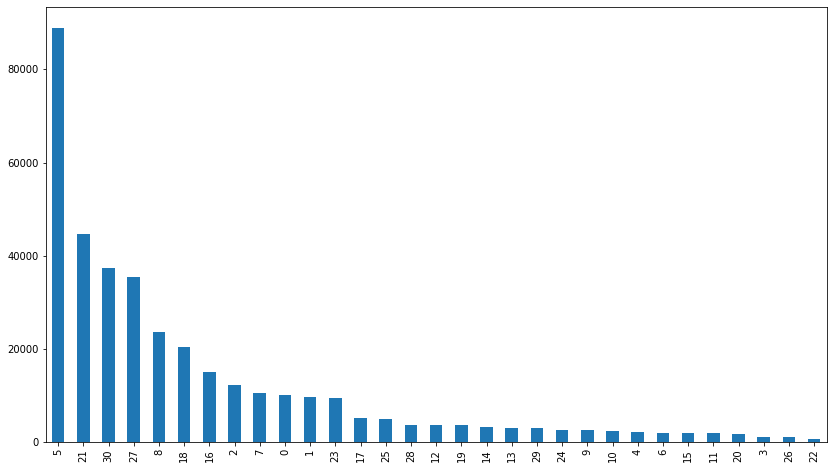

In [32]:
ax = df['Activity_Label'].value_counts().plot(kind='bar',figsize=(14,8))

In [33]:
import pickle

# Load model architecture
with open('biLSTMmodel_architecture.pkl', 'rb') as f:
    model = pickle.load(f)

# Load model weights
with open('biLSTMmodel_weights.pkl', 'rb') as f:
    model.set_weights(pickle.load(f))



Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-06 22:07:42         3799
variables.h5                                   2023-02-06 22:07:42      1051040
metadata.json                                  2023-02-06 22:07:42           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......bidirectional_1
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............ce

In [34]:
PredictorCol=['AccelX(g)_leg', 'AccelY(g)_leg', 'AccelZ(g)_leg', 'GyroX(¬∞/s)_leg',
       'GyroY(¬∞/s)_leg', 'GyroZ(¬∞/s)_leg', 'AccelX(g)_hand',
       'AccelY(g)_hand', 'AccelZ(g)_hand', 'GyroX(¬∞/s)_hand',
       'GyroY(¬∞/s)_hand', 'GyroZ(¬∞/s)_hand', 'AccelX(g)_chest',
       'AccelY(g)_chest', 'AccelZ(g)_chest', 'Sample(V)']
TargetCol= 'Activity_Label'

X = df[PredictorCol].values
y = df[TargetCol].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1.0, random_state=12)

In [36]:
X = np.array(X)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [37]:
prediction=model.predict(X)
from sklearn import metrics
#print(metrics.classification_report(y, prediction))
#print(metrics.confusion_matrix(y, prediction))

11500/11500 [==============================] - 31s 3ms/step


In [38]:
prediction = np.round(prediction)
prediction = np.argmax(prediction, axis=1)


In [39]:
print(classification_report(y, prediction))

              precision    recall  f1-score   support

           0       0.03      0.19      0.05     10070
           1       0.01      0.00      0.00      9759
           2       0.06      0.00      0.00     12257
           3       0.00      0.00      0.00      1189
           4       0.00      0.00      0.00      2253
           5       0.09      0.00      0.01     88895
           6       0.01      0.03      0.01      2003
           7       0.04      0.00      0.00     10439
           8       0.00      0.00      0.00     23712
           9       0.00      0.00      0.00      2500
          10       0.00      0.00      0.00      2438
          11       0.00      0.00      0.00      1875
          12       0.00      0.00      0.00      3631
          13       0.00      0.00      0.00      3067
          14       0.01      0.42      0.02      3255
          15       0.00      0.00      0.00      1877
          16       0.02      0.00      0.01     14940
          17       0.00    

In [40]:
test_loss, test_accuracy = model.evaluate(X, y)

print("Test Accuracy:", test_accuracy)


11500/11500 [==============================] - 34s 3ms/step - loss: 13.7840 - accuracy: 0.0086
Test Accuracy: 0.008609140291810036


In [41]:
df

,AccelX(g)_leg,AccelY(g)_leg,AccelZ(g)_leg,GyroX(¬∞/s)_leg,GyroY(¬∞/s)_leg,GyroZ(¬∞/s)_leg,AccelX(g)_hand,AccelY(g)_hand,AccelZ(g)_hand,GyroX(¬∞/s)_hand,GyroY(¬∞/s)_hand,GyroZ(¬∞/s)_hand,AccelX(g)_chest,AccelY(g)_chest,AccelZ(g)_chest,Sample(V),Activity_Label
0,-0.621653,0.469306,-0.509712,-24.017700,13.641566,-24.750134,-0.914015,-0.436103,0.203189,-7.232776,8.575570,-4.608225,-0.027771,0.902419,-0.315862,-0.006521,1
1,-0.621653,0.435859,-0.520333,-26.276036,15.899901,-25.665675,-0.884230,-0.441596,0.183658,-7.598993,8.453498,-4.730297,-0.027771,0.902419,-0.315862,-0.006521,1
2,-0.622751,0.419989,-0.560128,-25.848783,16.021973,-24.444953,-0.884352,-0.448432,0.208316,-4.730297,9.185931,-5.401694,-0.027771,0.902419,-0.315862,-0.006521,1
3,-0.625437,0.418280,-0.545846,-22.064546,14.923323,-18.829633,-0.893629,-0.447456,0.200626,-3.509575,9.308003,-6.012055,-0.011170,0.953689,-0.340276,-0.007868,1
4,-0.621164,0.406073,-0.505074,-9.430076,11.810483,-9.430076,-0.881422,-0.404730,0.189029,-0.457771,9.674220,-6.256199,-0.011170,0.953689,-0.340276,-0.007868,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367976,-1.160723,-0.046326,0.274479,33.417258,-35.919738,-34.149691,0.470649,0.293400,-0.783276,53.925383,3.082322,-27.862974,-0.303166,0.894118,0.033265,-0.010724,14
367977,-1.077592,-0.114809,0.132265,28.168154,-10.772869,-33.173114,0.466133,0.296574,-0.814771,54.047456,0.030518,-24.628061,-0.310491,0.842359,0.020081,-0.009413,14
367978,-1.013016,-0.075624,-0.015930,-3.082322,4.425116,-37.506676,0.465278,0.314397,-0.822217,53.864347,-3.326467,-19.562066,-0.310491,0.842359,0.020081,-0.009413,14
367979,-0.677317,0.022278,-0.229068,-41.412985,25.909819,-35.553521,0.456123,0.335149,-0.818677,46.540017,-7.354849,-14.190890,-0.289982,0.826734,-0.032166,-0.009739,14


In [42]:
from collections import defaultdict
label_counts = defaultdict(int)

for i in range(len(y)):
    actual_label = y[i]
    predicted_label = prediction[i]
    label_counts[f"actual_{actual_label}_predicted_{predicted_label}"] += 1
    print("Actual Label: ", actual_label, " Predicted Label: ", predicted_label)

print("\nLabel Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  24
Actual Label:  1  Predicted Label:  24
Actual Label:  1  Predicted Label:  0
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Predicted Label:  32
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  32
Actual Label:  5  Predicted Label:  32
Actual Label:  5  Predicted Label:  32
Actual Label:  5  Predicted Label:  11
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  0
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  32
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  11
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  11
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual La

In [43]:
from collections import defaultdict
label_counts = defaultdict(int)
total_counts = defaultdict(int)

for i in range(len(y)):
    actual_label = y[i]
    predicted_label = prediction[i]
    label_counts[f"actual_{actual_label}_predicted_{predicted_label}"] += 1
    total_counts[f'actual{actual_label}'] += 1

print("\nLabel Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

print("\nRatios:")
for label, count in label_counts.items():
    actual_label = label.split("_")[1]
    if f'actual{actual_label}' in total_counts:
        print(f"{label} ratio: {count / total_counts[f'actual{actual_label}']}")
    else:
        print(f"Ratio for {label} cannot be calculated because the actual label count is 0.")



Label Counts:
actual_1_predicted_14: 3003
actual_1_predicted_0: 1659
actual_1_predicted_24: 804
actual_1_predicted_12: 57
actual_1_predicted_11: 152
actual_1_predicted_32: 3158
actual_1_predicted_27: 312
actual_1_predicted_6: 277
actual_1_predicted_1: 13
actual_1_predicted_16: 37
actual_1_predicted_18: 1
actual_1_predicted_25: 3
actual_1_predicted_4: 17
actual_1_predicted_20: 253
actual_1_predicted_7: 9
actual_0_predicted_14: 3046
actual_0_predicted_32: 3114
actual_0_predicted_0: 1958
actual_0_predicted_27: 145
actual_0_predicted_12: 60
actual_0_predicted_4: 28
actual_0_predicted_7: 11
actual_0_predicted_24: 712
actual_0_predicted_16: 48
actual_0_predicted_6: 408
actual_0_predicted_1: 68
actual_0_predicted_11: 170
actual_0_predicted_20: 277
actual_27_predicted_16: 127
actual_27_predicted_0: 5710
actual_27_predicted_14: 11233
actual_27_predicted_32: 13412
actual_27_predicted_24: 2026
actual_27_predicted_20: 1041
actual_27_predicted_11: 627
actual_27_predicted_27: 231
actual_27_predicte

In [44]:
import pandas as pd

data = {'Label': [], 'Ratio': []}
for label, count in label_counts.items():
    actual_label = label.split("_")[1]
    if f'actual{actual_label}' in total_counts:
        data['Label'].append(label)
        data['Ratio'].append(count / total_counts[f'actual{actual_label}'])
    else:
        data['Label'].append(label)
        data['Ratio'].append("N/A")
        
df2 = pd.DataFrame(data)
print(df2)

                      Label     Ratio
0     actual_1_predicted_14  0.307716
1      actual_1_predicted_0  0.169997
2     actual_1_predicted_24  0.082385
3     actual_1_predicted_12  0.005841
4     actual_1_predicted_11  0.015575
..                      ...       ...
457  actual_14_predicted_20  0.030108
458  actual_14_predicted_27  0.009217
459   actual_14_predicted_6  0.019355
460   actual_14_predicted_5  0.000614
461  actual_14_predicted_16  0.000307

[462 rows x 2 columns]


In [45]:
import pandas as pd

results = []
for label, count in label_counts.items():
    actual_label = label.split("_")[1]
    if f'actual{actual_label}' in total_counts:
        ratio = count / total_counts[f'actual{actual_label}']
        total = total_counts[f'actual{actual_label}']
    else:
        ratio = None
    results.append([label, count,  total,ratio])

df2 = pd.DataFrame(results, columns=["Label", "Count","Total", "Ratio=count/total"])
print(df2)

                      Label  Count  Total  Ratio=count/total
0     actual_1_predicted_14   3003   9759           0.307716
1      actual_1_predicted_0   1659   9759           0.169997
2     actual_1_predicted_24    804   9759           0.082385
3     actual_1_predicted_12     57   9759           0.005841
4     actual_1_predicted_11    152   9759           0.015575
..                      ...    ...    ...                ...
457  actual_14_predicted_20     98   3255           0.030108
458  actual_14_predicted_27     30   3255           0.009217
459   actual_14_predicted_6     63   3255           0.019355
460   actual_14_predicted_5      2   3255           0.000614
461  actual_14_predicted_16      1   3255           0.000307

[462 rows x 4 columns]


In [46]:
pd.options.display.max_rows = None



In [47]:
df2

,Label,Count,Total,Ratio=count/total
0,actual_1_predicted_14,3003,9759,0.307716
1,actual_1_predicted_0,1659,9759,0.169997
2,actual_1_predicted_24,804,9759,0.082385
3,actual_1_predicted_12,57,9759,0.005841
4,actual_1_predicted_11,152,9759,0.015575
5,actual_1_predicted_32,3158,9759,0.323599
6,actual_1_predicted_27,312,9759,0.031970
7,actual_1_predicted_6,277,9759,0.028384
8,actual_1_predicted_1,13,9759,0.001332
9,actual_1_predicted_16,37,9759,0.003791


In [48]:
df2.sort_values(by='Ratio=count/total', ascending=False, inplace=True)


In [49]:
df2.to_csv("biLSTM_results.csv")

In [50]:
df2

,Label,Count,Total,Ratio=count/total
437,actual_26_predicted_0,670,1126,0.595027
293,actual_20_predicted_32,836,1750,0.477714
294,actual_20_predicted_14,769,1750,0.439429
303,actual_11_predicted_32,821,1875,0.437867
388,actual_22_predicted_0,319,751,0.424767
452,actual_14_predicted_14,1380,3255,0.423963
85,actual_8_predicted_32,9870,23712,0.416245
346,actual_10_predicted_0,964,2438,0.395406
412,actual_15_predicted_14,742,1877,0.395312
305,actual_11_predicted_14,733,1875,0.390933
